In [5]:
import os
import tarfile
import urllib.request

#데이터 불러오는 url
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

#웹주소에서 파일(housing.tgz)다운
#같은 디렉터리에 압축을 풀어 housing.csv 생성
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

import pandas as pd

#데이터 읽어오기
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()  # head 메서드를 사용해 처음 다섯 행 확인

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info() # info 메서드

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


total_bedrooms 특성은 20,433개만 널 값이 아니다. 즉, 207개의 구역은 특성을 가지고 있지 않다.

In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

value_count() 메서드로 각 카테고리마다 얼마나 많은 구역들이 있는지 확인

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


desribe() 메서드는 숫자형 특성의 요약 정보를 보여준다.

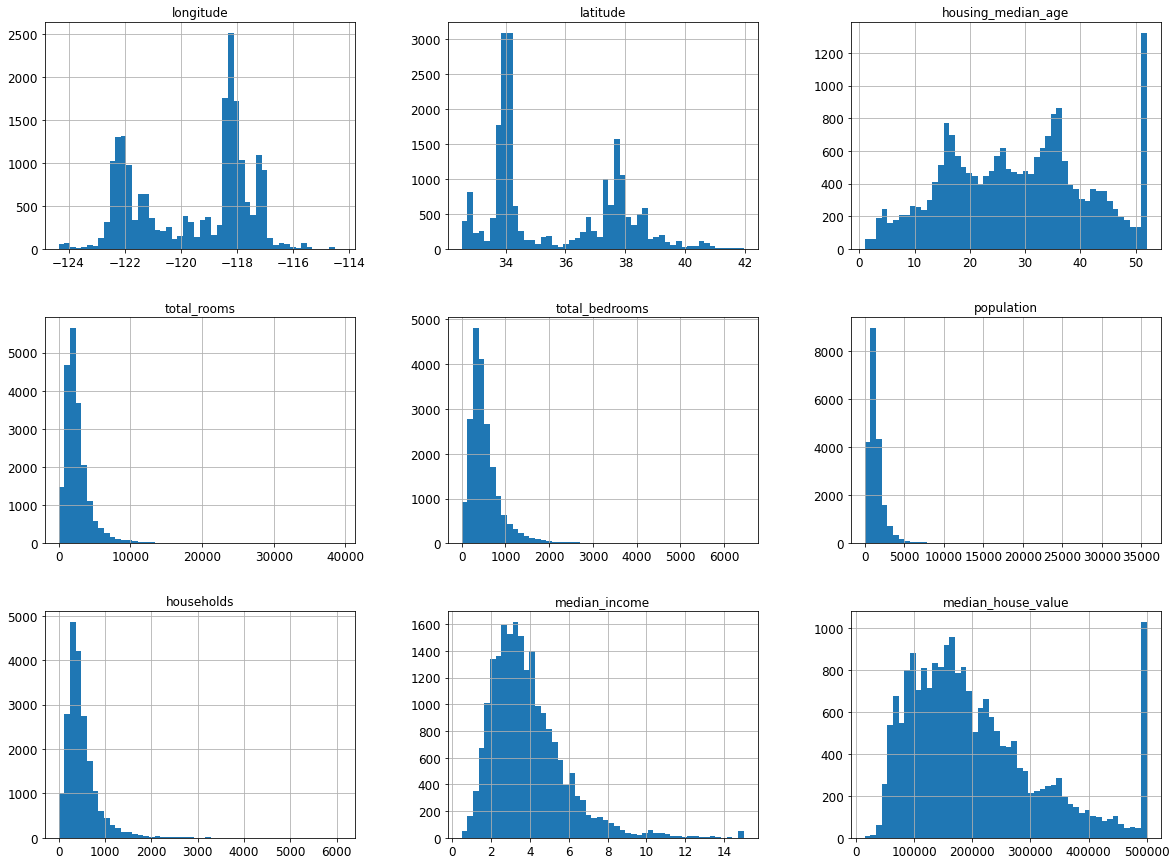

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

hist() 메서드는 모든 숫자형 특성에 대한 히스토그램을 출력한다.

In [27]:
#해시값 계산을 통해 샘플을 나눌 수 있다.
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [28]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [29]:
housing_with_id["id"] = housing["longitude"]*1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [30]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

구역의 위도와 경도는 몇백 년 후까지 안정적이라고 보장할 수 있으므로 두 값을 연결하여 다음과 같이  ID를 만들 수 있다.

<AxesSubplot:>

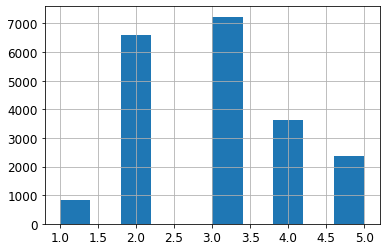

In [35]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0.,1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

pd.cut() 함수를 이용해 카테고리 5개를 가진 소득 카테고리 특성을 만든다. 
또한 hist() 메서드를 사용해 히스토그램을 만든다.

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

소득 카테고리를 기반으로 계층 샘플링

In [37]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

테스트 세트에서 소득 카테고리의 비율을 살펴본다.

In [38]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

income_cat 특성을 삭제해서 데이터를 원래 상태로 되돌리기

In [39]:
housing = strat_train_set.copy()

훈련 세트를 손상시키지 않기 위해 복사본을 만들어 사용한다.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

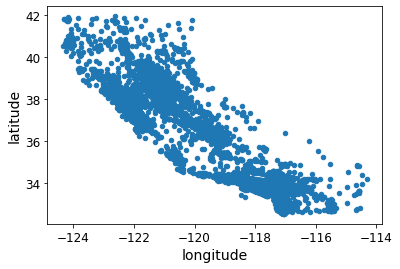

In [40]:
housing.plot(kind="scatter", x="longitude", y="latitude")

지리 정보(위도와 경도)가 있으니 모든 구역을 산점도로 만들어 데이터를 시각화하는 것은 좋은 생각이다.

이 그림은 캘리포니아 지역을 잘 나타내지만 어떤 특별한 패턴을 찾기는 힘들다. alpha 옵션을 0.1로 주면 데이터 포인트가 밀집된 영역을 잘 보여준다.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

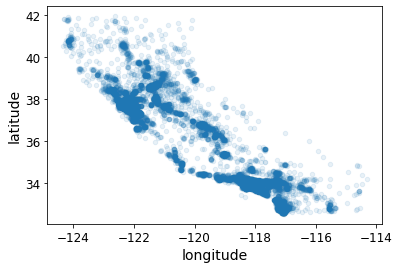

In [41]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

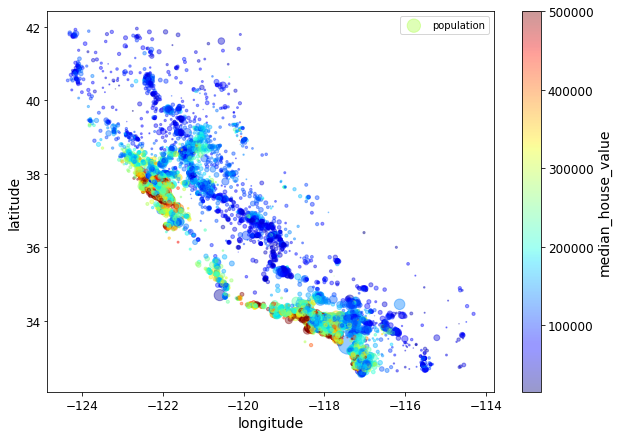

In [42]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

주택 가격을 나타내본다. 원의 반지름은 구역의 인구를 나타내고(매개변수 s), 색상은 가격을 나타낸다.(매개변수 c)  
미리 정의된 컬러 맵 중 파란색(낮은 가격)에서 빨간색(높은 가격)까지 범위를 가지는 jet을 사용한다.(매개변수 cmap)

In [46]:
corr_matrix = housing.corr()

In [47]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

corr() 메서드를 이용해 표준 상관계수를 계산한다.

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

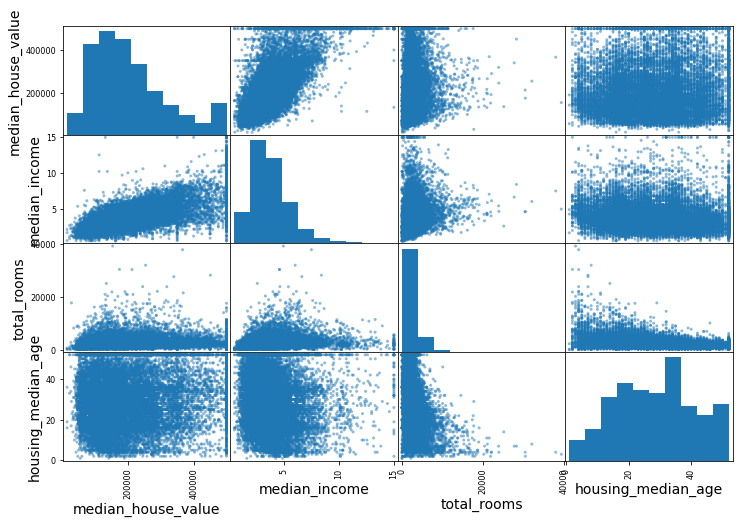

In [48]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

산점도로 특성 사이의 상관관계를 확인할 수 있다.  판다스의 scatter_matrix 함수를 사용해 산점도를 그려본다.

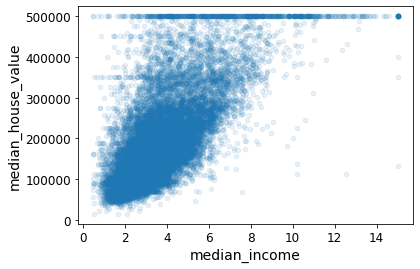

In [49]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1);

중간 주택 가격을 예측하는 데 가장 유용할 것  같은 특성은 중간 소득이므로 상관관계 산점도를 확대해본다.

In [50]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [51]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

여러 조합의 특성을 실험해본다. 상관관계 행렬을 다시 확인해본다.

In [52]:
housing = strat_train_set.drop("median_house_value",axis=1)  
housing_labels = strat_train_set["median_house_value"].copy() 

먼저 원래 훈련 세트로 복원하고, 예측 변수와 타깃값에 같은 변형을 적용하지 않기 위해 예측 변수와 레이블을 분리한다.

In [53]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

사이킷런을 이용해 누락된 값을 채운다. 누락된 값을 특성의 중간값으로 대체한다고 지정하여  SimpleImputer의 객체를 생성한다.

In [55]:
housing_num=housing.drop("ocean_proximity", axis=1)

중간값이 수치형 특성에서만 계산될 수 있기 때문에 텍스트 특성인 ocean_proximity를 제외한 데이터 복사본을 생성한다.

In [56]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [57]:
X = imputer.transform(housing_num)  #넘파이 배열

In [58]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)  #데이터프레임으로

In [59]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


지금까지는 수치형 특성만 다루었다. 지금부터는 텍스트 특성을 살펴본다. 처음 10개 샘플에서 특성값을 확인해본다.

In [61]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

범주형 특성이다. 이 카테고리를 텍스트에서 숫자로 변환한다. 이를 위해 사이킷런의 OrdinalEncoder 클래스를 사용한다.

In [62]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

categories_ 인스턴스 변수를 사용해 카텍고리 목록을 얻을 수 있다. 범주형 특성마다 카테고리들의 ID 배열을 담은 리스트가 반환된다.

In [63]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

사이킷런은 범주의 값을 원-핫 벡터로 바꾸기 위한 OneHotEncoer 클래스를 제공한다.

In [64]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

넘파이 배열로 바꾸려면 toarray()메서드를 호출하면 된다.

In [65]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

변환기 만들기

In [71]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs가 아닙니다.
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 더 할 일이 없습니다.
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

In [74]:
#변환 파이프라인 만들기
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder',CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

Pipeline 클래스는 연속된 변환을 순서대로 처리할 수 있도록 도와준다.

In [76]:
#수치형, 범주형 하나의 변환기로 처리하기
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

 먼저 ColumnTransformer 클래스를 임포트 한 후, 수치형 열 이름의 리스트와 범주형 열 이름의 리스트를 만든다. 
 <br>그 후 ColumnTransFormer 클래스 객체를 만든다. 마지막으로 ColumnTransFormer를 주택 데이터에 적용한다.

In [77]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

선형 회귀 모델을 훈련시켜본다. 완전히 작동하는 선형 회귀 모델을 만들었다.

In [78]:
#훈련샘플 적용해보기
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("예측:", lin_reg.predict(some_data_prepared))
print("레이블:", list(some_labels))

예측: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
레이블: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


훈련 세트에 있는 몇 개 샘플에 대해 적용해본다.

In [95]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

사이킷런의 mean_square_error 함수를 사용해 전체 훈련 세트에 대한 이 휘기 모델의 RSME를 측정해본다.

확실히 좋은 점수는 아니다. 오차가 너무 크다. 이는 모델이 훈련 데이터에 과소적합된 사례이다.

In [96]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

DecisionTreeRegressor를 훈련시켜본다. 오차가 0이므로 과대적합이다.

In [83]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                         scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

k-겹 교차 검증 기능을 사용한다. 훈련 세트를 fold라 불리는 10개의 서브셋으로 무작위로 분할한다.

In [91]:
def display_scores(scores):
    print("점수",scores)
    print("평균",scores.mean())
    print("표준편차",scores.std())

display_scores(tree_rmse_scores)

점수 [69313.45650958 68118.35286218 70273.89852375 68859.88790027
 70289.74443709 73604.63406899 69624.00282163 70461.32835464
 77329.50114977 69036.56259084]
평균 70691.13692187428
표준편차 2620.905312176502


결정 트리 결과가 이전만큼 좋아 보이지 않는다. 실제로 선형 회귀 모델보다 나쁘다.

In [99]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수 [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균 69052.46136345083
표준편차 2731.6740017983457


확실히 결정 트리 모델이 과대적합되어 선혀 회귀 모델보다 성능이 나쁜걸 알 수 있다.

In [100]:
# 랜덤 포레스트 모델
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18707.743283081174

In [103]:
display_scores(forest_rmse_scores)

점수 [49430.67685966 47431.44421221 50046.03624914 51998.22614987
 49731.88659677 53464.7702059  48869.63470211 47715.54566
 53084.59904425 49975.46342198]
평균 50174.828310188386
표준편차 1967.2141062245903


점수가 좋아보인다. 랜덤 포레스트는 꽤나 좋다. <br>하지만 훈련세트에 대한 점수가 검증 세트에 대한 점수보다 훨씬 낮으므로 이 모델도 여전히 훈련 세트에 과대 적합 되어있다.

In [106]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'n_estimators':[3,10,30],'max_features':[2,4,6,7]},
        {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
    ]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 7],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

param_grid 설정에 따라 사이킷런이 먼저 첫 번째 dict에 있는 n_estimator와 max_features 하이퍼파라미터의 조합인 3* 4= 12를 평가하고<br>
두 번째 dict에 있는 하이퍼파라미터의 조합인 2* 3=6개를 시도한다. 
<br>하지만 두 번쨰는 bootstrap 하이퍼파라미터를 True(기본값)가 아니라 False로 설정한다.
<br>모두 합하면 그리드 탐색이 RandomForestRegressor 하이퍼파라미터의 값의 12+6=18개 조합을 탐색하고 각각 다섯 번 모델을 훈련시킨다.

In [107]:
grid_search.best_params_

{'max_features': 7, 'n_estimators': 30}

In [109]:
#파라미터 평가점수 확인
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    

63902.358445262915 {'max_features': 2, 'n_estimators': 3}
55539.629972972136 {'max_features': 2, 'n_estimators': 10}
52802.7187827898 {'max_features': 2, 'n_estimators': 30}
60684.4495528356 {'max_features': 4, 'n_estimators': 3}
52985.67565597985 {'max_features': 4, 'n_estimators': 10}
50608.529423290085 {'max_features': 4, 'n_estimators': 30}
59592.3504949219 {'max_features': 6, 'n_estimators': 3}
52069.19941848656 {'max_features': 6, 'n_estimators': 10}
50150.89322321707 {'max_features': 6, 'n_estimators': 30}
58680.82859532775 {'max_features': 7, 'n_estimators': 3}
52271.571383185605 {'max_features': 7, 'n_estimators': 10}
49857.58566935774 {'max_features': 7, 'n_estimators': 30}
62200.56959243291 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54481.67922540453 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59644.66957579553 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52526.071660149915 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

이 예에서는 max_features 하이퍼파라미터가 8, n_estimators 하이퍼파라미터가 30일때 최적의 솔루션이다. 
<br>이때 RSME점수가 49.682로 앞서 기본 하이퍼파라미터 설정으로 얻은 50.182보다 조금 더 좋다. 

In [112]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.86910894e-02, 6.81429429e-02, 4.07194331e-02, 1.64582408e-02,
       1.50220988e-02, 1.59178242e-02, 1.47318179e-02, 3.14864366e-01,
       6.97486772e-02, 1.12457081e-01, 7.60911024e-02, 1.00748738e-02,
       1.59826856e-01, 9.22555899e-06, 2.64138173e-03, 4.60298932e-03])

RandomForestRegressor가 정확한 예측을 만들기 위한 각 특성의 상대적인 중요도를 알려준다.

In [113]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3148643662449755, 'median_income'),
 (0.15982685593948073, 'INLAND'),
 (0.11245708070694586, 'pop_per_hhold'),
 (0.07869108943504047, 'longitude'),
 (0.07609110236878992, 'bedrooms_per_room'),
 (0.06974867719390195, 'rooms_per_hhold'),
 (0.06814294288633417, 'latitude'),
 (0.040719433137706124, 'housing_median_age'),
 (0.016458240827755, 'total_rooms'),
 (0.015917824243354813, 'population'),
 (0.01502209876131675, 'total_bedrooms'),
 (0.01473181786173939, 'households'),
 (0.01007487378498555, '<1H OCEAN'),
 (0.0046029893160927145, 'NEAR OCEAN'),
 (0.0026413817325911864, 'NEAR BAY'),
 (9.225558989890277e-06, 'ISLAND')]

중요도 다음에 그에 대응하는 특성 이름을 표시해보았다.

In [117]:
final_model = grid_search.best_estimator_

x_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

x_test_prepared = full_pipeline.transform(x_test)

final_predictions = final_model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47656.76748180403

테스트 세트에서 최종 모델을 평가한다.

In [119]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45631.93434361, 49599.00746678])

scipy.stats.t.interval()를 사용해 일반화 오차의 95% 신뢰구간을 계산할 수 있다.